# Demo

In [1]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Dense, Input, Embedding
from keras.models import Model
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os,sys
from scipy import stats


Using TensorFlow backend.


# Getting raw input names

In [2]:
with open('cleaned_inputs.txt', 'r') as f:
    raw_text = f.read()
    raw_inputs = raw_text.split('\n')

# Creating dictionary of characters

In [3]:
char2id = dict((c,i) for (i, c) in enumerate(sorted(set(raw_text.replace('\n', ' '))),1))
id2char = dict(enumerate(sorted(set(raw_text.replace('\n', ' '))),1))
char2id['<PAD>'] = 0
id2char[0] = '<PAD>'

print(char2id)

{' ': 1, "'": 2, '-': 3, '.': 4, 'A': 5, 'B': 6, 'C': 7, 'D': 8, 'E': 9, 'F': 10, 'G': 11, 'H': 12, 'I': 13, 'J': 14, 'K': 15, 'L': 16, 'M': 17, 'N': 18, 'O': 19, 'P': 20, 'Q': 21, 'R': 22, 'S': 23, 'T': 24, 'U': 25, 'V': 26, 'W': 27, 'X': 28, 'Y': 29, 'Z': 30, 'a': 31, 'b': 32, 'c': 33, 'd': 34, 'e': 35, 'f': 36, 'g': 37, 'h': 38, 'i': 39, 'j': 40, 'k': 41, 'l': 42, 'm': 43, 'n': 44, 'o': 45, 'p': 46, 'q': 47, 'r': 48, 's': 49, 't': 50, 'u': 51, 'v': 52, 'w': 53, 'x': 54, 'y': 55, 'z': 56, '<PAD>': 0}


In [4]:
raw_inputs[:5]

['Terry Bross',
 'Alieu Touray-Saidy',
 'Albert Prince-Cox',
 'Roy Vagelos',
 'Laura de la Torre Tur']

# Preprocessing inputs for the model

In [5]:
inputs = [[char2id[char] for char in name] for name in raw_inputs]
inputs = pad_sequences(inputs, maxlen=40, padding='post')
inputs[:5]

array([[24, 35, 48, 48, 55,  1,  6, 48, 45, 49, 49,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 5, 42, 39, 35, 51,  1, 24, 45, 51, 48, 31, 55,  3, 23, 31, 39,
        34, 55,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 5, 42, 32, 35, 48, 50,  1, 20, 48, 39, 44, 33, 35,  3,  7, 45,
        54,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [22, 45, 55,  1, 26, 31, 37, 35, 42, 45, 49,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [16, 31, 51, 48, 31,  1, 34, 35,  1, 42, 31,  1, 24, 45, 48, 48,
        35,  1, 24, 51, 48,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0]], dtype=int32)

# Preprocessing labels

In [41]:
with open('labels.txt', 'r') as f:
    raw_labels = f.read().split('\n')

In [42]:
#raw_labels[:5]

In [95]:
##ini_array = np.array(raw_labels)
##final_array = b = 
x = np.array(raw_labels[:1803677])
labels = to_categorical(x.astype(float))
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

# Splitting the data into Training and Testing sets 

In [103]:
inputs = inputs[:1803677]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.33, random_state=42)


# LSTM Model

In [105]:
input_layer = Input((None,))
x = Embedding(len(char2id), 32)(input_layer)
x = LSTM(256)(x)
x = Dense(512)(x)
x = Dense(2, activation='softmax')(x)

model = Model(input_layer, x)

In [106]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [107]:
history = model.fit(X_train, y_train, batch_size=1024, epochs=5, validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 966770 samples, validate on 241693 samples
Epoch 1/5





966770/966770 [==============================] - 1272s 1ms/step - loss: 0.4467 - acc: 0.7836 - val_loss: 0.3785 - val_acc: 0.8273
Epoch 2/5
966770/966770 [==============================] - 1265s 1ms/step - loss: 0.3528 - acc: 0.8411 - val_loss: 0.3280 - val_acc: 0.8570
Epoch 3/5
966770/966770 [==============================] - 1356s 1ms/step - loss: 0.3051 - acc: 0.8677 - val_loss: 0.2922 - val_acc: 0.8734
Epoch 4/5
966770/966770 [==============================] - 1326s 1ms/step - loss: 0.2611 - acc: 0.8911 - val_loss: 0.2565 - val_acc: 0.8918
Epoch 5/5
966770/966770 [==============================] - 1276s 1ms/step - loss: 0.2242 - acc: 0.9092 - val_loss: 0.2102 - val_acc: 0.9179


# Plot Accuracy and Loss curves

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


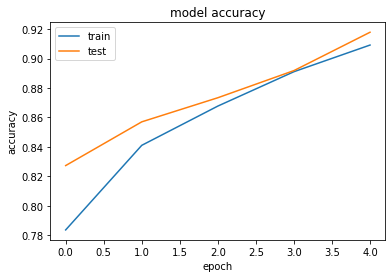

In [108]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

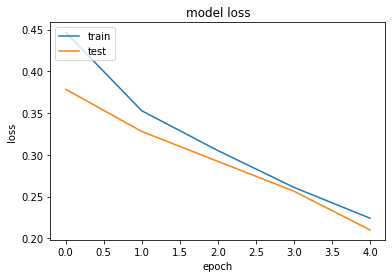

In [109]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluating the model on the testing set 

In [110]:
loss, acc = model.evaluate(X_test, y_test, batch_size=1024)
print('accuracy: ',acc)
print('loss: ',loss)

595214/595214 [==============================] - 246s 413us/step
accuracy:  0.9175321817001116
loss:  0.21040715930637585


In [111]:
label_dict = ['Non person name', 'Person Name']

In [112]:
test_string = 'Ricardo Diaz'
test_predict = np.expand_dims([char2id[char] for char in test_string],0)
test_predict = pad_sequences(test_predict, maxlen=40, padding='post')

output = model.predict(test_predict)
print(test_string,'is a',label_dict[np.argmax(output)])

Ricardo Diaz is a Person Name


In [113]:
test_string = 'Thiago Galery'
test_predict = np.expand_dims([char2id[char] for char in test_string],0)
test_predict = pad_sequences(test_predict, maxlen=40, padding='post')

output = model.predict(test_predict)
print(test_string,'is a',label_dict[np.argmax(output)])

Thiago Galery is a Person Name


In [114]:
test_string = 'Jean Claude von Muchausen Gordon-Smith'
test_predict = np.expand_dims([char2id[char] for char in test_string],0)
test_predict = pad_sequences(test_predict, maxlen=40, padding='post')

output = model.predict(test_predict)
print(test_string,'is a',label_dict[np.argmax(output)])

Jean Claude von Muchausen Gordon-Smith is a Person Name


In [124]:
test_string = 'eat'
test_predict = np.expand_dims([char2id[char] for char in test_string],0)
test_predict = pad_sequences(test_predict, maxlen=40, padding='post')

output = model.predict(test_predict)
print(test_string,'is a',label_dict[np.argmax(output)])

eat is a Non person name


In [131]:
test_string = 'Washing Hand'
test_predict = np.expand_dims([char2id[char] for char in test_string],0)
test_predict = pad_sequences(test_predict, maxlen=40, padding='post')

output = model.predict(test_predict)
print(test_string,'is a',label_dict[np.argmax(output)])

Washing Hand is a Non person name


# Saving the model

In [117]:
model.save('model-v1.h5')